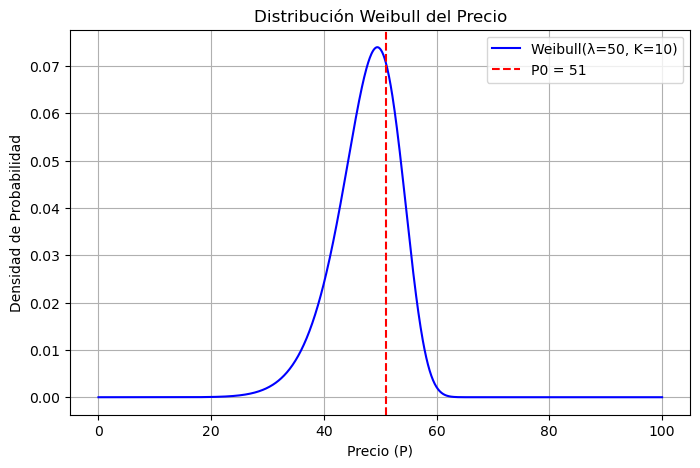

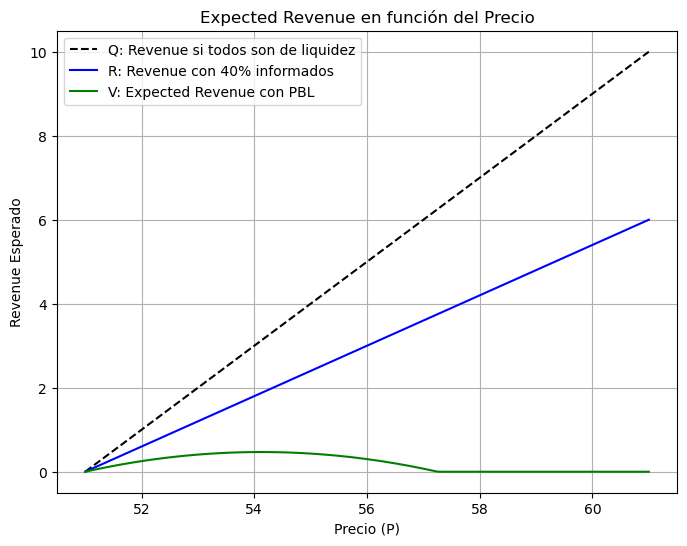

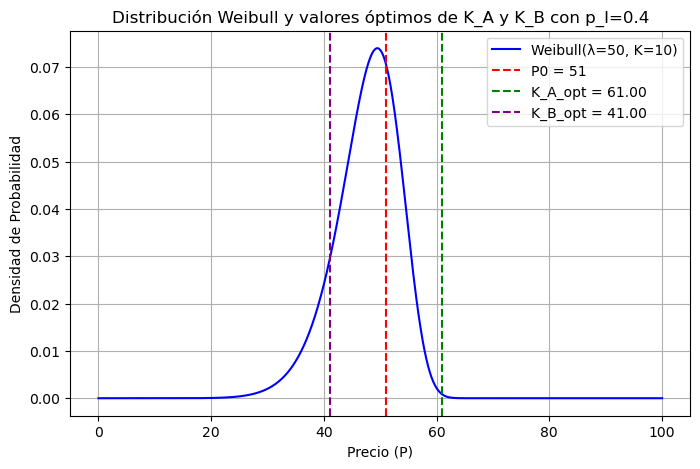

K_A óptimo: 61.00
K_B óptimo: 41.00
Máximo Expected Revenue: 5.80


In [3]:
# Cargar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import minimize

# --- Parámetros Globales ---
lambda_ = 50
k = 10
P0 = 51
pi_I = 0.4

# --- Función de densidad de la distribución Weibull ---
def weibull_pdf(S):
    return weibull_min.pdf(S, k, scale=lambda_)

# --- Punto 1: Graficar la Distribución Weibull ---
def plot_weibull_distribution():
    x = np.linspace(0, 100, 1000)
    pdf = weibull_pdf(x)
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf, label=f'Weibull(λ={lambda_}, K={k})', color='blue')
    plt.axvline(P0, color='red', linestyle='--', label=f'P0 = {P0}')
    plt.xlabel('Precio (P)')
    plt.ylabel('Densidad de Probabilidad')
    plt.title('Distribución Weibull del Precio')
    plt.legend()
    plt.grid()
    plt.show()

# --- Punto 2: Graficar Expected Revenue ---
def plot_expected_revenue():
    prices = np.linspace(P0, P0 + 10, 100)
    q_values = prices - P0  
    r_values = q_values * (1 - pi_I)  
    pli_values = np.clip(0.5 - 0.08 * (prices - P0), 0, 0.5)  
    v_values = r_values * pli_values  

    plt.figure(figsize=(8, 6))
    plt.plot(prices, q_values, linestyle='--', color='black', label="Q: Revenue si todos son de liquidez")
    plt.plot(prices, r_values, linestyle='-', color='blue', label="R: Revenue con 40% informados")
    plt.plot(prices, v_values, linestyle='-', color='green', label="V: Expected Revenue con PBL")
    plt.xlabel("Precio (P)")
    plt.ylabel("Revenue Esperado")
    plt.title("Expected Revenue en función del Precio")
    plt.legend()
    plt.grid()
    plt.show()

# --- Punto 3: Optimización del Revenue Esperado ---
def optimize_expected_revenue():
    def expected_revenue(params):
        K_A, K_B = params
        S_KA = S[S >= K_A]
        S_KB = S[S <= K_B]
        int_KA = np.trapz((S_KA - K_A) * weibull_pdf(S_KA), S_KA)
        int_KB = np.trapz((K_B - S_KB) * weibull_pdf(S_KB), S_KB)
        term1 = (1 - pi_I) * (0.5 * (K_A - P0) + 0.5 * (P0 - K_B))
        term2 = pi_I * (int_KA + int_KB)
        return -(term1 - term2)

    bounds = [(P0 - 10, P0 + 10), (P0 - 10, P0 + 10)]
    S = np.linspace(0, 100, 1000)
    initial_guess = [P0 + 2, P0 - 2]
    result = minimize(expected_revenue, initial_guess, bounds=bounds)
    K_A_opt, K_B_opt = result.x
    max_revenue = -result.fun

    x = np.linspace(0, 100, 1000)
    pdf = weibull_pdf(x)
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf, label=f'Weibull(λ={lambda_}, K={k})', color='blue')
    plt.axvline(P0, color='red', linestyle='--', label=f'P0 = {P0}')
    plt.axvline(K_A_opt, color='green', linestyle='--', label=f'K_A_opt = {K_A_opt:.2f}')
    plt.axvline(K_B_opt, color='purple', linestyle='--', label=f'K_B_opt = {K_B_opt:.2f}')
    plt.xlabel('Precio (P)')
    plt.ylabel('Densidad de Probabilidad')
    plt.title('Distribución Weibull y valores óptimos de K_A y K_B con p_I=0.4')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'K_A óptimo: {K_A_opt:.2f}')
    print(f'K_B óptimo: {K_B_opt:.2f}')
    print(f'Máximo Expected Revenue: {max_revenue:.2f}')

# --- Ejecutar todas las funciones ---
plot_weibull_distribution()
plot_expected_revenue()
optimize_expected_revenue()
